In [41]:
from google.colab import drive
import pandas as pd
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:

!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-03-05 08:51:01--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2024-03-05 08:51:01--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3e322069dd07062896ca0ae069.dl.dropboxusercontent.com/cd/0/get/COiHPumMKi6zApmonq4WLkdOVtIJHWsBoHFBcDn_4plpRQMxvyIBqi2vDth-9PYKyNkd3TqiSRTvku7bteYiBoWerVhO2TmC0tDjnMv1bSj3xJyG0S0wqsc_JKIFy8ydbyFHCWePdCZtIg9UmlM97Uw_/file?dl=1# [following]
--2024-03-05 08:51:02--  https://uc3e322069dd07062896ca0ae069.dl.dropboxusercontent.com/cd/0/get/COiHPumMKi6zApmonq4WLkdOVtIJHWsBoHFBcDn_4plpRQMxvyIBqi2

In [59]:
import konlpy
import re

In [60]:
hannanum = konlpy.tag.Hannanum()

In [61]:
fname = ["seoul1.txt","seoul2.txt"]
stop_word = ["서울시","서울","나라","우리나라","대한민국","시장님", "안녕", "시행", "정책", "공급", "경우","생각"]

In [62]:
list = []
for f in fname:
  seoul = open("/content/gdrive/My Drive/"+f, encoding="UTF-8").read()
  seoul = re.sub('[^가-힣]', ' ', seoul)
  for w in stop_word:
    seoul = re.sub(w, ' ', seoul)
  nouns = hannanum.nouns(seoul)
  list +=nouns

In [64]:
df_word = pd.DataFrame({
    'word':list
})

In [65]:
df_word['count'] = df_word['word'].str.len()

In [66]:
df_word

,word,count
0,올해,2
1,월,1
2,여의,2
3,선착장,3
4,리버버스,4
...,...,...
1926,교통열악,4
1927,대책,2
1928,호,1
1929,연장,2


In [50]:
df_word = df_word.query('count >= 2')

In [51]:
df_word

,word,count
0,올해,2
2,여의,2
3,선착장,3
4,리버버스,4
5,운행,2
...,...,...
1925,주민들,3
1926,교통열악,4
1927,대책,2
1929,연장,2


In [52]:
df_word = df_word.groupby('word', as_index=False) \
          .agg(n = ('word', 'count')) \
          .sort_values('n', ascending=False)

In [53]:
df_word.head(20)

,word,n
337,부대시설,13
602,이용,12
331,복리시설,11
377,사업,10
278,문제,10
720,주민들,10
649,장애,10
156,노선,9
409,설치,9
372,사람,8


In [54]:
from wordcloud import WordCloud

In [55]:
dic_word = df_word.set_index('word').to_dict()['n']

In [56]:
dic_word

{'부대시설': 13,
 '이용': 12,
 '복리시설': 11,
 '사업': 10,
 '문제': 10,
 '주민들': 10,
 '장애': 10,
 '노선': 9,
 '설치': 9,
 '사람': 8,
 '한강': 8,
 '버스': 7,
 '정류장': 7,
 '상가': 7,
 '진행': 7,
 '주택': 7,
 '선정': 7,
 '아파트': 6,
 '답변': 6,
 '필요': 6,
 '지역': 6,
 '관련하': 6,
 '장애인': 6,
 '해결': 6,
 '본인': 6,
 '요구': 6,
 '주민': 6,
 '방법': 5,
 '추첨제': 5,
 '산모들': 5,
 '테이블': 5,
 '지하철': 5,
 '이상': 5,
 '기존': 5,
 '프로젝트': 5,
 '비율': 5,
 '하나': 5,
 '분양': 5,
 '신청서': 5,
 '추산액': 5,
 '용산역': 5,
 '동네': 4,
 '용산': 4,
 '교통': 4,
 '의견': 4,
 '필라테스': 4,
 '다음': 4,
 '그것': 4,
 '이하': 4,
 '표지판': 4,
 '공간': 4,
 '일부': 4,
 '정관등': 4,
 '가액': 4,
 '감사': 4,
 '최소분양단위규모': 4,
 '대상자': 4,
 '운영': 4,
 '지급': 4,
 '불편함': 4,
 '언론': 3,
 '손목닥터': 3,
 '민원': 3,
 '신청': 3,
 '노력': 3,
 '르네상스': 3,
 '센터': 3,
 '명동입구': 3,
 '궁금': 3,
 '구로구': 3,
 '어르신들': 3,
 '노인분': 3,
 '나무': 3,
 '소나무': 3,
 '맘카페': 3,
 '마음': 3,
 '환경': 3,
 '나머지': 3,
 '특별': 3,
 '동의': 3,
 '내국인': 3,
 '쓰레기': 3,
 '금액': 3,
 '강북': 3,
 '기준': 3,
 '판단': 3,
 '기사': 3,
 '중증': 3,
 '활동': 3,
 '우리': 3,
 '지도': 3,
 '가점제': 3,
 '여의': 3,
 '반대': 3,
 '일정': 

In [57]:
font = "/content/gdrive/My Drive/DoHyeon-Regular.ttf"

# 워드클라우드 객체 생성
wc = WordCloud(font_path=font,
               width=400,
               height=400,
               background_color="white")

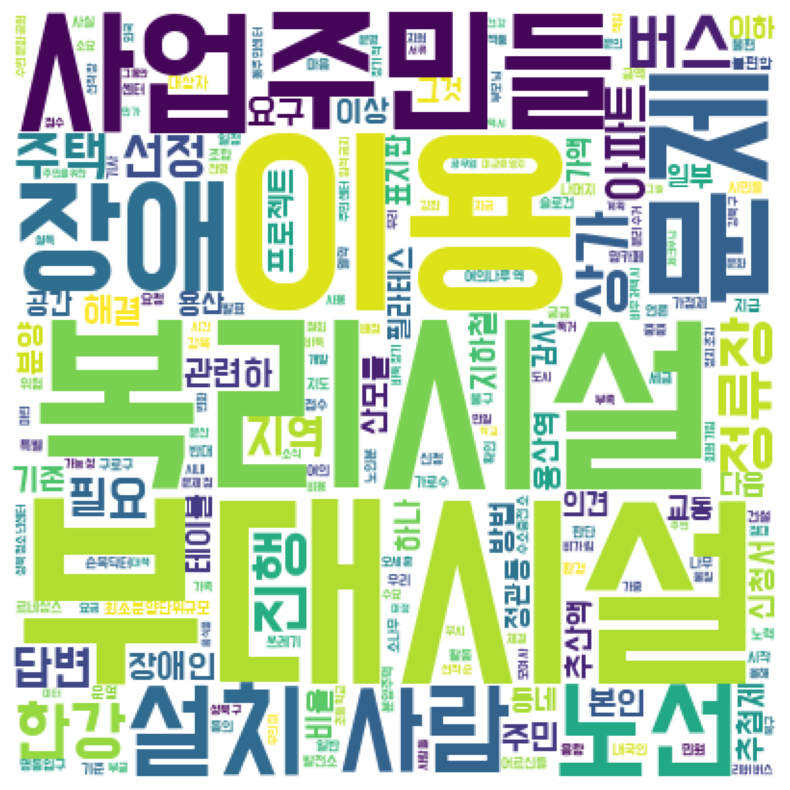

In [58]:
# 위의 워드클라우드 객체에 데이터를 설정
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 생성된 워드클라우드 이미지를 matplotlib을 통해서 화면에 그려줍니다.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))       #도화지 크기 설정
plt.axis('off')                   #축을 나타내지 않기
plt.imshow(img_wordcloud)         #이미지 출력